# Audio data acquisition

### Importing of all libraries

In [ ]:
import os
import matplotlib.pyplot as plt
from google.colab import drive

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

from numpy import asarray
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np 
import os
import matplotlib.pyplot as plt
import imageio
import random
import matplotlib.image as mpimg
import cv2

### Connecting to Google Drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Path of data

In [ ]:
audio_fpath = "/content/drive/MyDrive/ml_dl/audio-2/ambulance/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in ambulance audio folder = ",len(audio_clips))

No. of .wav files in ambulance audio folder =  200


### Loading an example file .wav

In [ ]:
x, sr = librosa.load(audio_fpath+audio_clips[2])

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(66150,) 22050


### Plotting the wave

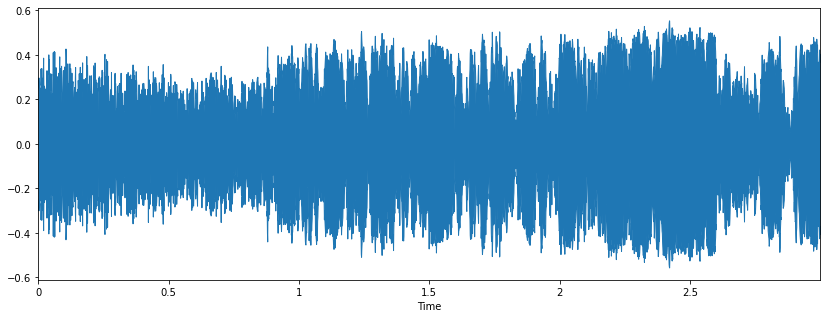

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x)

### Plotting the spectrogram

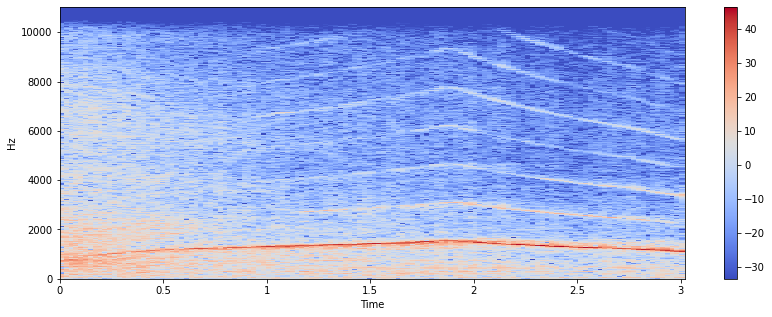

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Generating and saving spectrograms

In [ ]:
ambulance_audio_path = "/content/drive/MyDrive/ml_dl/audio-2/audio-2/ambulance/"
firetruck_audio_path = "/content/drive/MyDrive/ml_dl/audio-2/audio-2/firetruck/"
traffic_audio_path = "/content/drive/MyDrive/ml_dl/audio-2/audio-2/traffic/"


ambulance_save_path = "/content/drive/MyDrive/ml_dl/audio-2/spectogram/ambulance/"
firetruck_save_path = "/content/drive/MyDrive/ml_dl/audio-2/spectogram/firetruck/"
traffic_save_path = "/content/drive/MyDrive/ml_dl/audio-2/spectogram/traffic/"

### Generating and saving

In [ ]:
def generating_and_saving(data_path, save_path):
  format = ".png"
  for f in os.listdir(data_path) :
    x, sr = librosa.load(data_path+f)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    img = librosa.display.specshow(Xdb, sr=sr)
    file_name = f.split(".")[0]
    file_name = file_name+format
    path = save_path+file_name
    plt.savefig(path)

### Generating and saving for *ambulance* data



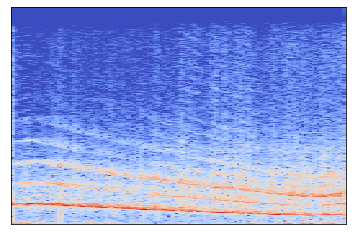

In [ ]:
generating_and_saving(ambulance_audio_path, ambulance_save_path)

### Generating and saving for *firetruck* data


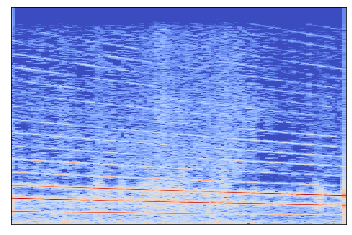

In [ ]:
generating_and_saving(firetruck_audio_path, firetruck_save_path)

### Generating and saving for *traffic* data


In [ ]:
generating_and_saving(traffic_audio_path, traffic_save_path)

### Creating a dataset with stectrograms

In [ ]:
IMG_WIDTH = 100
IMG_HEIGHT = 100

spectogram_img_path = r'/content/drive/MyDrive/ml_dl/audio-2/spectogram'

In [ ]:
def create_dataset(img_folder):
    img_data_array = []
    class_name = []
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path = os.path.join(img_folder, dir1,  file)
            image = cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 
            #img = Image.open(img_folder+"/"+dir1+"/"+file)
            #image = asarray(img)
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name 

### Getting the spectrogram data (the problem is an image-classification)

In [ ]:
img_data, class_name = create_dataset(spectogram_img_path)

In [ ]:
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'ambulance': 0, 'firetruck': 1, 'traffic': 2}

In [ ]:
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
X = np.array(img_data, np.float32)

In [ ]:
y = np.array(list(map(int,target_val)), np.float32)

In [ ]:
X.shape

(602, 100, 100, 3)

In [ ]:
X = X.reshape(X.shape[0], (X[0].shape[0]*X[0].shape[1]*X[0].shape[2]))

In [ ]:
X.shape

(602, 30000)

### Train - validation - test split

In [ ]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, train_size=0.6, random_state=43) # 60% training and 40% validation + test
X_validation, X_test, y_validation, y_test = train_test_split(X_tmp, y_tmp, train_size=0.6, random_state=43) # 60% validation and 40% test

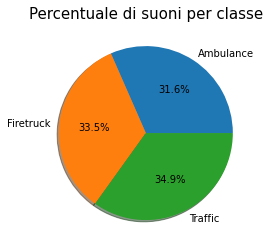

In [ ]:
data = []
label=["Ambulance", "Firetruck", "Traffic"]

for classNum in range(len(label)):
  data.append(np.sum(np.array(y_train) == classNum)) 

plt.title("Percentage of sound classes", fontsize=15)
plt.pie(data, labels=label, shadow=True, autopct='%1.1f%%')
plt.show()

### Saving the NumPy arrays in a GoogleDrive folder

In [ ]:
np.save('/content/drive/MyDrive/ml_dl/audio-2/training_set/X_train.npy', X_train)
np.save('/content/drive/MyDrive/ml_dl/audio-2/training_set/y_train.npy', y_train)

np.save('/content/drive/MyDrive/ml_dl/audio-2/validation_set/X_validation.npy', X_validation)
np.save('/content/drive/MyDrive/ml_dl/audio-2/validation_set/y_validation.npy', y_validation)

np.save('/content/drive/MyDrive/ml_dl/audio-2/test_set/X_test.npy', X_test)
np.save('/content/drive/MyDrive/ml_dl/audio-2/test_set/y_test.npy', y_test)

np.save('/content/drive/MyDrive/ml_dl/audio-2/dataset/X.npy', X)
np.save('/content/drive/MyDrive/ml_dl/audio-2/dataset/y.npy', y)